### **Python Functions & Recursions**

#### **Table of Contents**
1. [Introduction](#Introduction)
2. [Python_Functions](#python-functions)
3. [Recurstion](#Recursion)
4. [Recursion_Analysis](#Recursion_analysis)
5. [Recursion_Optimization](#Recursion_Optimization)
6. [Advanced_Recursive_Patterns](#Advanced_Recursive_Patterns)


#### **Learning Objectives**
By the end of this notebook, you will be able to:
- Define and use Python functions effectively.
- Understand the principles of recursion.
- Analyze recursive algorithms using recursion trees and the Master Theorem.
- Optimize recursive solutions with memoization and tail recursion.
- Apply recursion to solve complex problems.
- Recognize recursive patterns in algorithms.

#### 1. **Introduction**:
- Functions and recursion are fundamental concepts in programming and algorithm design. Functions allow us to organize code into reusable blocks, while recursion provides an elegant way to solve problems by breaking them down into smaller, similar subproblems.
- In this notebook, we'll explore Python functions and dive deep into recursion, including analysis techniques like the recursion tree method and Master Theorem, which are essential tools for understanding the time and space complexity of recursive algorithms.

#### 2. **python-functions**:
Functions are blocks of reusable code designed to perform a specific task.


#### 3. **Recursion**:
Recursion is a method of solving problems where a function calls itself.

**Recursive Thinking**:
Recursive solutions are built on two key elements:
1. Breaking down a problem into smaller instances of the same problem.
2. A base case that stops the recursion.

**Base Cases and Recursive Cases**:
Every recursive function must have:
1. At least one base case that can be solved directly.
2. At least one recursive case that reduces the problem size.

#### 4. **Recursion Analysis**
Analyzing recursive algorithms is crucial to understand their time and space complexity.
1. Recursion Tree Method: The recursion tree method helps visualize the recursive calls and count the work done at each level.
2. Recurrence Relations: Recurrence relations mathematically describe the running time of recursive algorithms.
3. Master Theorem: The Master Theorem provides a cookbook method for solving many common recurrence relations, particularly for divide-and-conquer algorithms.

for recurrence relation of form:
T(n) = a * T(n / b) + f(n)
where:
- a >= 1: number of subproblems
- b > 1: factor by which problem size is divided.
- f(n): cost of dividing and combining.

Masters Theorem gives following cases:
- If f(n) = O(n^c) where c < log_b(a), then T(n) = Θ(n^(log_b(a)))
- If f(n) = Θ(n^c) where c = log_b(a), then T(n) = Θ(n^c log n)
- If f(n) = Ω(n^c) where c > log_b(a), then T(n) = Θ(f(n))

C:\Users\disha\AppData\Local\Temp\ipykernel_18924\767180236.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


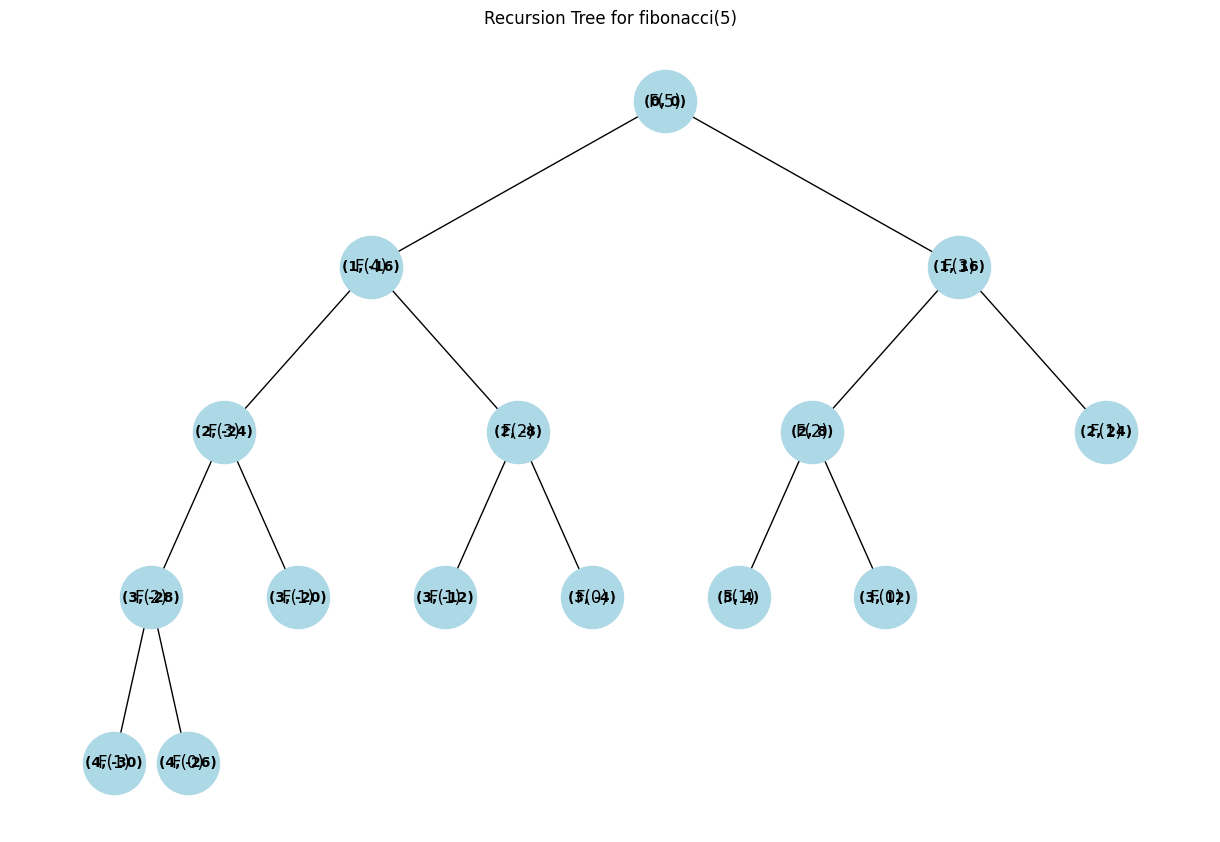

In [2]:
# Let's visualize the recursion tree for fibonacci(5)
import matplotlib.pyplot as plt
import networkx as nx

def create_fibonacci_tree(n, G=None, pos=None, parent=None, level=0, index=0):
    """Create a graph visualization of the Fibonacci recursion tree"""
    if G is None:
        G = nx.DiGraph()
        pos = {}
    
    # Create node for current call
    node = (level, index)
    label = f"F({n})"
    G.add_node(node, label=label)
    
    # Position the node in the graph
    pos[node] = (index, -level)
    
    # Connect to parent if not root
    if parent is not None:
        G.add_edge(parent, node)
    
    # Base cases
    if n <= 1:
        return G, pos
    
    # Recursive calls
    G, pos = create_fibonacci_tree(n-1, G, pos, node, level+1, index-2**(4-level))
    G, pos = create_fibonacci_tree(n-2, G, pos, node, level+1, index+2**(4-level))
    
    return G, pos

# Create the tree
G, pos = create_fibonacci_tree(5)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue",
       font_size=10, font_weight="bold", arrows=False)

# Replace node labels with Fibonacci values
labels = {node: data["label"] for node, data in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos, labels=labels)

plt.title("Recursion Tree for fibonacci(5)")
plt.axis("off")
plt.tight_layout()

Analyzing the recursion tree for fibonacci(5):
- Height of the tree: O(n)
- Number of nodes: O(2^n)
- Work per node: O(1)
- Total time complexity: O(2^n)

This shows why the naive recursive Fibonacci is exponential in time complexity.

#### 5. **Recursion Optimization**:
Recursive algorithms can sometimes be inefficient due to repeated calculations. Here are techniques to optimize them.
1. **Memoization**: Memoization is a technique that stores previously computed results to avoid redundant calculations.
2. **Tail Recursion**: Tail recursion is a special form of recursion where the recursive call is the last operation in the function.

In [3]:
# Naive recursive Fibonacci vs. memoized version
import time
def fibonacci_naive(n):
    """Naive recursive implementation of Fibonacci"""
    if n <= 1:
        return n
    return fibonacci_naive(n-1) + fibonacci_naive(n-2)

def fibonacci_memoized(n, memo={}):
    """Memoized recursive implementation of Fibonacci"""
    if n in memo:
        return memo[n]
    
    if n <= 1:
        result = n
    else:
        result = fibonacci_memoized(n-1, memo) + fibonacci_memoized(n-2, memo)
    
    memo[n] = result
    return result

# Compare performance
n = 35
print(f"Computing fibonacci({n})...")

start = time.time()
result1 = fibonacci_memoized(n)
memo_time = time.time() - start
print(f"Memoized version: {result1} in {memo_time:.6f} seconds")



Computing fibonacci(35)...
Memoized version: 9227465 in 0.000000 seconds


In [6]:
start = time.time()
result2 = fibonacci_naive(n)
naive_time = time.time() - start
print(f"Naive version: {result2} in {naive_time:.6f} seconds")
print(f"Speedup factor: {naive_time/(memo_time + 0.001):.1f}x")

Naive version: 9227465 in 1.908683 seconds
Speedup factor: 1908.7x


In [7]:
# Regular recursive factorial
def factorial_recursive(n):
    if n == 0 or n == 1:
        return 1
    return n * factorial_recursive(n-1)

# Tail recursive factorial
def factorial_tail(n, accumulator=1):
    if n == 0 or n == 1:
        return accumulator
    return factorial_tail(n-1, n * accumulator)

# Test both implementations
n = 5
print(f"{n}! (recursive) = {factorial_recursive(n)}")
print(f"{n}! (tail recursive) = {factorial_tail(n)}")

5! (recursive) = 120
5! (tail recursive) = 120


**Benefits of tail recursion**:
- Can be optimized by the compiler/interpreter (in some languages, not fully in Python).
- Reduces stack space usage.
- Can often be easily converted to iteration.

In [8]:
# Converting tail recursion to iteration
def factorial_iterative(n):
    result = 1
    for i in range(1, n+1):
        result *= i
    return result

print(f"{n}! (iterative) = {factorial_iterative(n)}")

5! (iterative) = 120


#### 6. **Advanced Recursive Patterns**:

**Divide and Conquer**:
Divide and conquer is a recursion strategy with three steps:
1. Divide the problem into smaller subproblems.
2. Conquer the subproblems by solving them recursively.
3. Combine the solutions to get the final result.

**Backtracking**: Backtracking is a recursive strategy that builds candidates to a solution incrementally and abandons a candidate ("backtracks") as soon as it determines the candidate cannot be extended to a valid solution.

**Dynamic Programming**: Dynamic Programming (DP) combines recursion with memoization to solve problems with overlapping subproblems.


In [9]:
# Quick Sort: A classic divide and conquer algorithm
def quick_sort(arr):
    """Sort an array using the quicksort algorithm"""
    if len(arr) <= 1:
        return arr
    
    # Choose pivot (here simply the first element)
    pivot = arr[0]
    
    # Divide the array into elements less than, equal to, and greater than pivot
    less = [x for x in arr[1:] if x < pivot]
    equal = [x for x in arr if x == pivot]
    greater = [x for x in arr[1:] if x > pivot]
    
    # Recursively sort subarrays and combine
    return quick_sort(less) + equal + quick_sort(greater)

# Test the function
unsorted = [3, 6, 8, 10, 1, 2, 1]
print(f"Unsorted: {unsorted}")
print(f"Sorted: {quick_sort(unsorted)}")

Unsorted: [3, 6, 8, 10, 1, 2, 1]
Sorted: [1, 1, 2, 3, 6, 8, 10]


In [10]:
# N-Queens Problem: Place N queens on an N×N chessboard so no two queens attack each other
def solve_n_queens(n):
    """Find a solution to the N-Queens problem"""
    # Initialize empty board
    board = [['.' for _ in range(n)] for _ in range(n)]
    solutions = []
    
    def is_safe(row, col):
        # Check if a queen can be placed at board[row][col]
        
        # Check row (left side, as we're filling from left to right)
        for c in range(col):
            if board[row][c] == 'Q':
                return False
        
        # Check upper diagonal
        for r, c in zip(range(row, -1, -1), range(col, -1, -1)):
            if board[r][c] == 'Q':
                return False
        
        # Check lower diagonal
        for r, c in zip(range(row, n, 1), range(col, -1, -1)):
            if board[r][c] == 'Q':
                return False
        
        return True
    
    def place_queens(col):
        # Base case: all queens are placed
        if col >= n:
            # Add the current board configuration to solutions
            solution = [''.join(row) for row in board]
            solutions.append(solution)
            return
        
        # Try placing queen in each row of the current column
        for row in range(n):
            if is_safe(row, col):
                # Place queen
                board[row][col] = 'Q'
                
                # Recur to place rest of the queens
                place_queens(col + 1)
                
                # Backtrack (remove queen to try other positions)
                board[row][col] = '.'
    
    # Start placing queens from the first column
    place_queens(0)
    return solutions

# Test the function with 4-Queens problem
solutions = solve_n_queens(4)
print(f"Found {len(solutions)} solutions to the 4-Queens problem:")
for i, solution in enumerate(solutions, 1):
    print(f"\nSolution {i}:")
    for row in solution:
        print(row)

# Analysis of N-Queens with backtracking:
# Time Complexity: O(N!), as there are N choices for the first row, 
# at most N-1 for the second row, and so on
# Space Complexity: O(N) for the recursion stack

Found 2 solutions to the 4-Queens problem:

Solution 1:
..Q.
Q...
...Q
.Q..

Solution 2:
.Q..
...Q
Q...
..Q.


In [11]:
# Longest Common Subsequence (LCS) using DP
def longest_common_subsequence(text1, text2):
    """Find the length of the longest common subsequence between two strings"""
    m, n = len(text1), len(text2)
    
    # Create DP table
    dp = [[0 for _ in range(n+1)] for _ in range(m+1)]
    
    # Fill the DP table
    for i in range(1, m+1):
        for j in range(1, n+1):
            if text1[i-1] == text2[j-1]:
                dp[i][j] = dp[i-1][j-1] + 1
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])
    
    # Reconstruct the LCS
    lcs = []
    i, j = m, n
    while i > 0 and j > 0:
        if text1[i-1] == text2[j-1]:
            lcs.append(text1[i-1])
            i -= 1
            j -= 1
        elif dp[i-1][j] > dp[i][j-1]:
            i -= 1
        else:
            j -= 1
    
    return ''.join(reversed(lcs))

# Test the function
str1 = "ABCBDAB"
str2 = "BDCABA"
lcs = longest_common_subsequence(str1, str2)
print(f"LCS of '{str1}' and '{str2}' is '{lcs}' with length {len(lcs)}")

LCS of 'ABCBDAB' and 'BDCABA' is 'BDAB' with length 4
